In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


# Import data
df = pd.read_excel('Oxygen_Dissociation_Data.xlsx')
df.columns

Index(['PO2 (mmHg)', 'FracHb'], dtype='object')

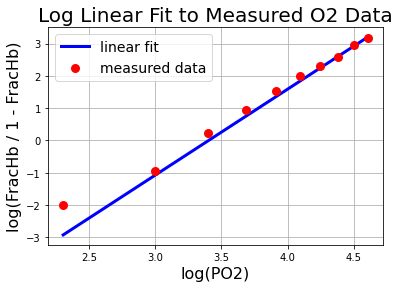

In [15]:
po2 = np.log(df['PO2 (mmHg)'])
frac_hb = np.log(df['FracHb']/(1 - df['FracHb']))

# Plot measured data, find linear points
plt.scatter(po2, frac_hb, label='measured data', color='r', lw=3, zorder=3)  # 7, 8, 9 are linear (use for fit)

# Linear fit
m, b = np.polyfit(po2[7:], frac_hb[7:], 1)  # Using index 7, 8, 9
fitx = [min(po2), max(po2)]
fity = [m*x + b for x in fitx]

# Plot fit
plt.plot(fitx, fity, label='linear fit', color='b', lw=3)
plt.grid()
plt.xlabel('log(PO2)', fontsize=16)
plt.ylabel('log(FracHb / 1 - FracHb)', fontsize=16)
plt.title('Log Linear Fit to Measured O2 Data', fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [42]:
def hill(po2, p50, n):
    return po2**n / (p50**n + po2**n)

In [48]:
# Range between 0 and 100% po2 content
po2s = np.linspace(0, 100, 10000)

# p50 values to interrogate
p50s = [20, 28, 35]

# Generate curves corresponding to each p50 value
p50_curves = [[hill(i, j, m) for i in po2s] for j in p50s]

# Plot
fig = px.line(x=po2s, y=p50_curves, width=1200, height=800)
fig.update_layout(
    title = {
        'text': 'Hemoglobin O2 Saturation as a Function of Pressure',
        'x': 0.5,
        'font_size': 40
    },
    legend = {
        'font': {
            'size': 25
        }
    }
)

fig.data[0].name, fig.data[1].name, fig.data[2].name = [f'{x} mmHg P50' for x in p50s]

fig.update_xaxes(title_text='pO2 (mmHg)', title_font=dict(size=30), tickfont=dict(size=20))
fig.update_yaxes(title_text='Hemoglobin Fraction', title_font=dict(size=30), tickfont=dict(size=20))
fig.show()

In [53]:
# Formula to extimate p50 from the fit values
estimated_p50 = np.e**(-b/m)

# n values to interrogate
ns = [2, 2.5, 3]

# Generate curves corresponding to each n value
n_curves = [[hill(i, estimated_p50, n) for i in po2s] for n in ns]

# Plot
fig = px.line(x=po2s, y=n_curves, width=1200, height=800)
fig.update_layout(
    title = {
        'text': 'Hemoglobin O2 Saturation as a Function of Pressure',
        'x': 0.5,
        'font_size': 40
    },
    legend = {
        'font': {
            'size': 25
        }
    }
)

fig.data[0].name, fig.data[1].name, fig.data[2].name = [f'n = {x}' for x in ns]

fig.update_xaxes(title_text='pO2 (mmHg)', title_font=dict(size=30), tickfont=dict(size=20))
fig.update_yaxes(title_text='Hemoglobin Fraction', title_font=dict(size=30), tickfont=dict(size=20))
fig.show()